In [ ]:
!pip install wandb

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
import wandb
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

Mounted at /gdrive


In [7]:
run = wandb.init(project="animals")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [8]:
config = wandb.config
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]

In [9]:
dataset_path_train = "/gdrive/MyDrive/dataset/animal"
width = height =224

idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    # zoom_range=0.1,
    validation_split=0.1,
)

train_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
)
val_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    subset='validation',
)

Found 1171 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


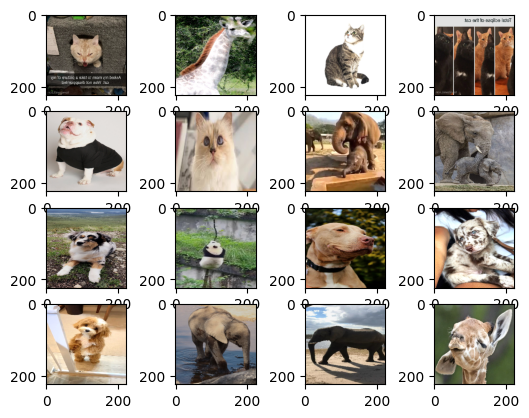

In [10]:
train_images = next(train_data)[0]
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_images[i])

In [30]:
model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling ='avg'
    )

9406464/9406464 [==============================] - 0s 0us/step


# Freeze

In [34]:
for layer in model.layers[0:-4]:
  layer.trainable = False

In [35]:
my_model = models.Sequential([
    model,
    layers.Dropout(0.2),
    layers.Dense(5, activation="softmax"),
])

In [37]:
my_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint("/gdrive/MyDrive/best_model_animal",
                                            save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [38]:
history = my_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20 ,
    callbacks=[stop_early, checkpoint,wandb_callbacks]
    )

Epoch 1/20
37/37 [==============================] - ETA: 0s - loss: 0.5936 - accuracy: 0.8121

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 114s 3s/step - loss: 0.5936 - accuracy: 0.8121 - val_loss: 0.2345 - val_accuracy: 0.9609
Epoch 2/20
37/37 [==============================] - ETA: 0s - loss: 0.1791 - accuracy: 0.9547

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 60s 2s/step - loss: 0.1791 - accuracy: 0.9547 - val_loss: 0.1338 - val_accuracy: 0.9844
Epoch 3/20
37/37 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9735

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 61s 2s/step - loss: 0.1014 - accuracy: 0.9735 - val_loss: 0.1027 - val_accuracy: 0.9922
Epoch 4/20
37/37 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9846

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 59s 2s/step - loss: 0.0641 - accuracy: 0.9846 - val_loss: 0.0891 - val_accuracy: 0.9844
Epoch 5/20
37/37 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9923

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 59s 2s/step - loss: 0.0409 - accuracy: 0.9923 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 6/20
37/37 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9940

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 61s 2s/step - loss: 0.0293 - accuracy: 0.9940 - val_loss: 0.0683 - val_accuracy: 0.9766
Epoch 7/20
37/37 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9991

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9957

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 60s 2s/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0535 - val_accuracy: 0.9844
Epoch 9/20
37/37 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9983

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 59s 2s/step - loss: 0.0138 - accuracy: 0.9983 - val_loss: 0.0510 - val_accuracy: 0.9766
Epoch 10/20
37/37 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9983

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 60s 2s/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 0.0406 - val_accuracy: 0.9844
Epoch 11/20
37/37 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 40s 1s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9766
Epoch 12/20
37/37 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9983

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 40s 1s/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.0577 - val_accuracy: 0.9922
Epoch 13/20
37/37 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 41s 1s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9844
Epoch 14/20
37/37 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9991

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 40s 1s/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0479 - val_accuracy: 0.9844
Epoch 15/20
37/37 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 39s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9922
Epoch 16/20
37/37 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9991

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 41s 1s/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0647 - val_accuracy: 0.9766
Epoch 17/20
37/37 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 41s 1s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9844
Epoch 18/20
37/37 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 39s 1s/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0542 - val_accuracy: 0.9844
Epoch 19/20
37/37 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


37/37 [==============================] - 40s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 20/20
37/37 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.0s


37/37 [==============================] - 40s 1s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9844


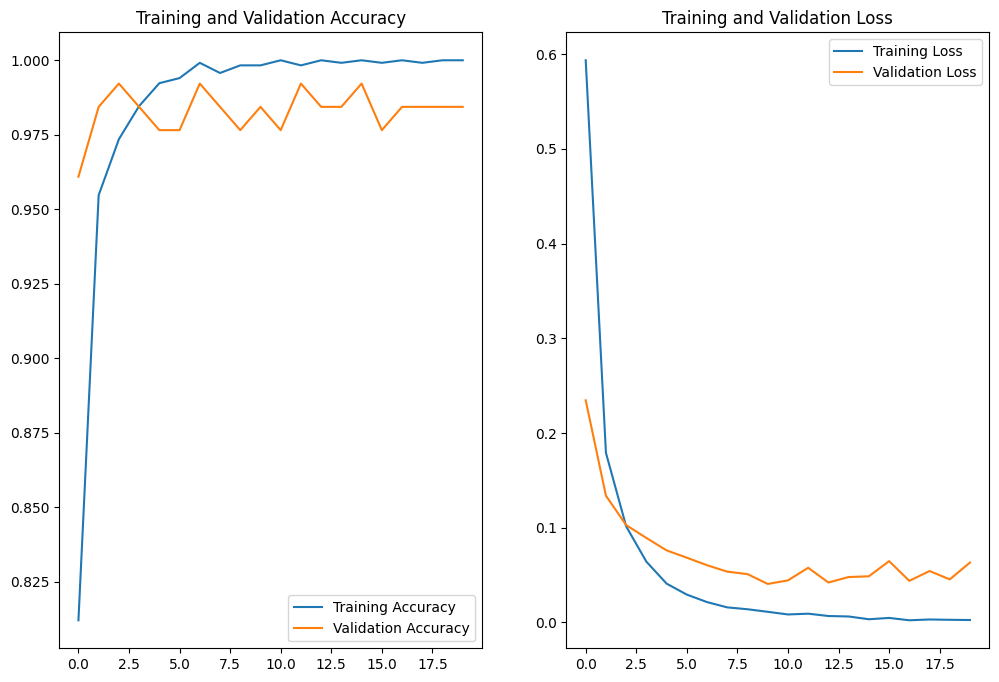

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/best_model_animal')
# new_history = loaded_model.fit(train_dataset, epochs=20,
#                     validation_data=test_dataset,
#                     validation_steps=30,
#                     callbacks=[stop_early, checkpoint],
#                     )
loaded_model.evaluate(val_data)

4/4 [==============================] - 4s 482ms/step - loss: 0.0644 - accuracy: 0.9766


[0.06437432765960693, 0.9765625]

In [41]:
drive.mount('/gdrive', force_remount=True)
loaded_model.save('/gdrive/MyDrive/dataset/animal.h5')

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
